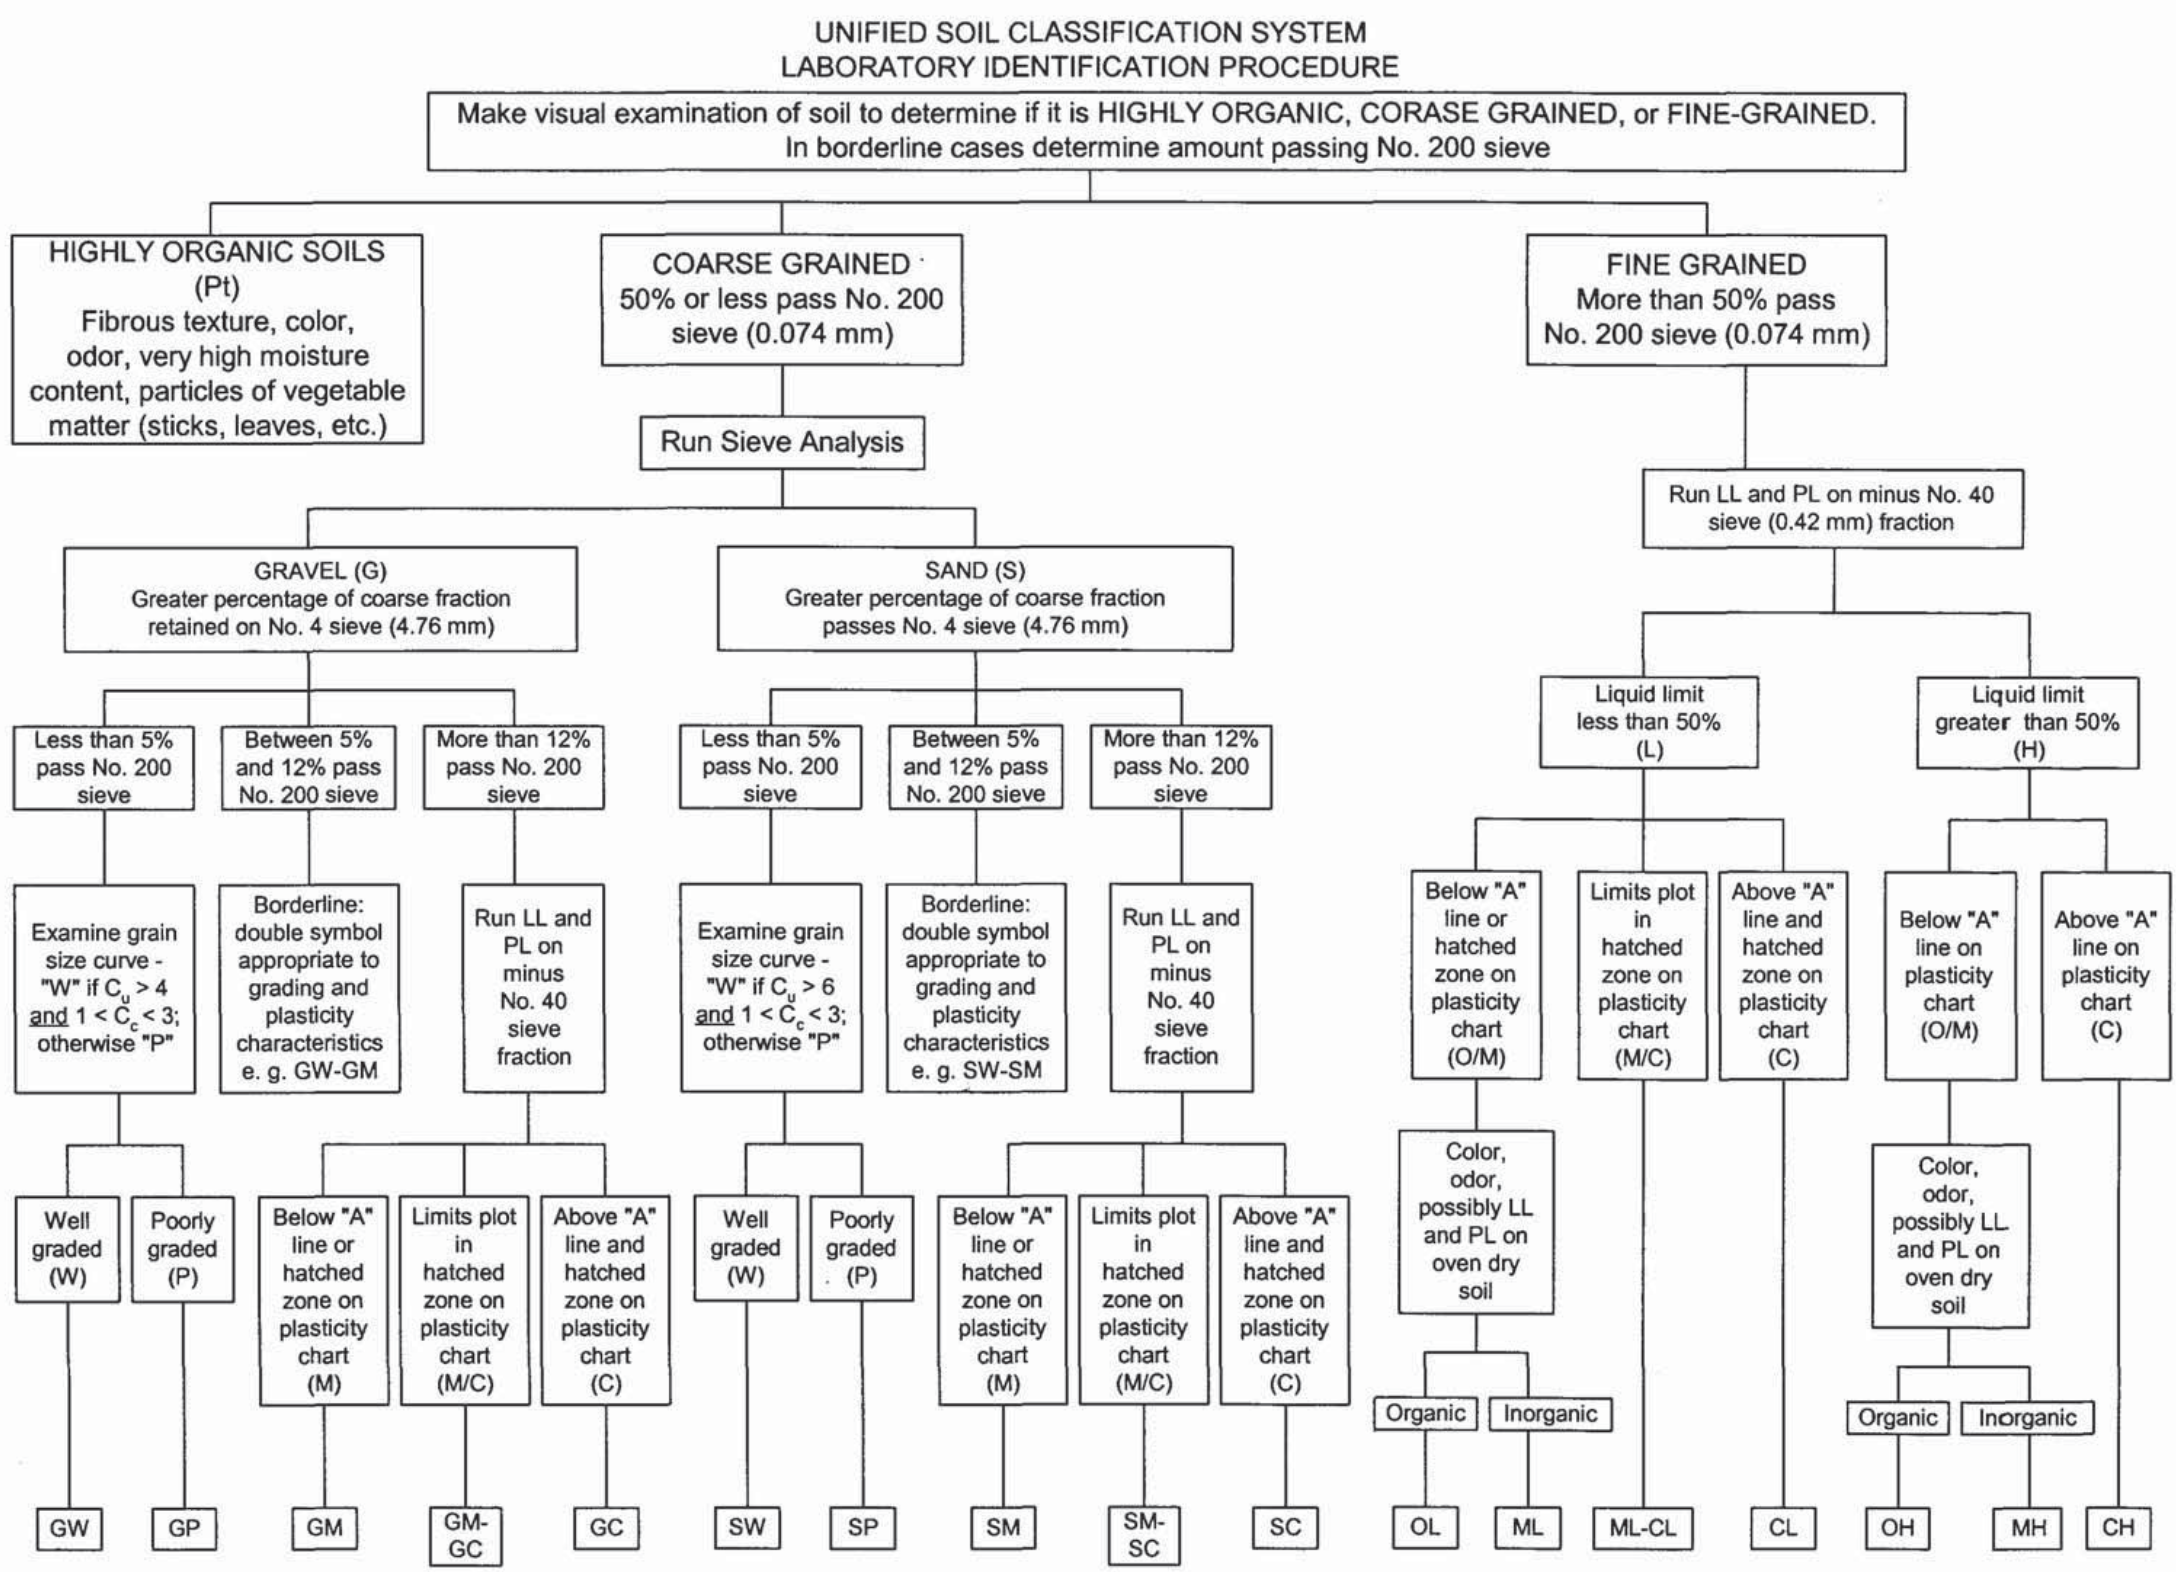

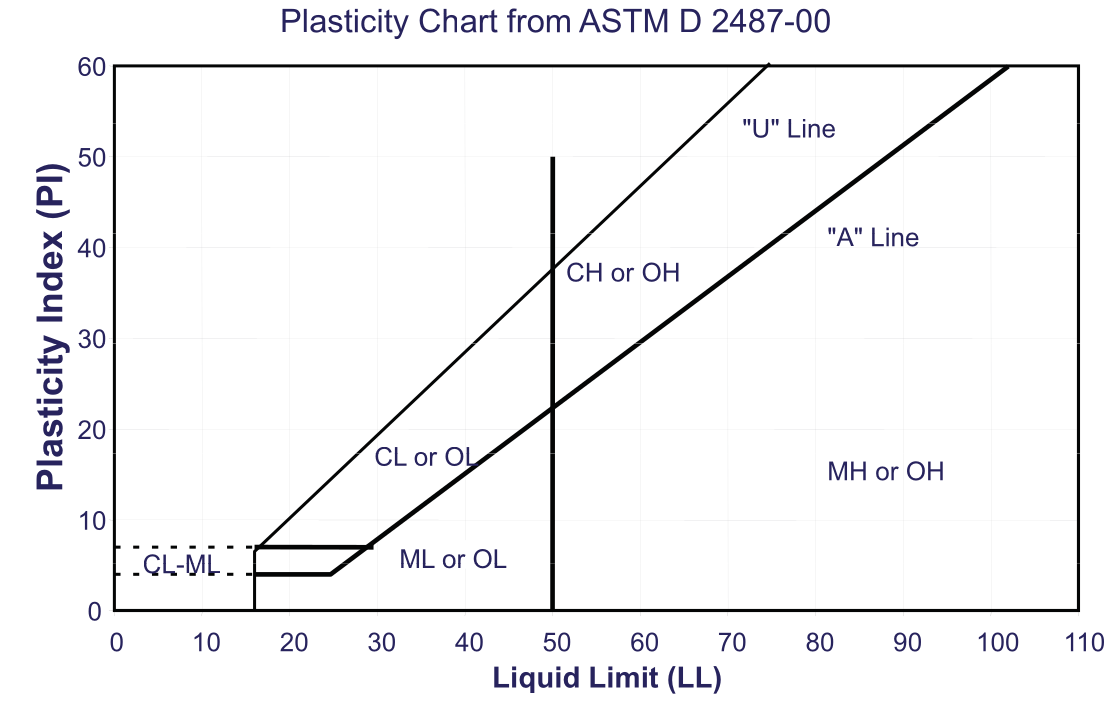

In [ ]:
'''
The initial part of the soil classification program (#Data input) has been provided for you. This part
allows you to enter the required inputs to classify any given soil. The input parameters
used are defined as the following:

  D10: 10th percentile of grain diameter (by weight), in mm
  D30: 30th percentile of grain diameter (by weight), in mm
  D60: 60th percentile of grain diameter (by weight), in mm
        LL: Liquid limit
        PL: Plastic limit
        Sieve4: Percentage of soil weight passing No. 4 sieve
        Sieve200: Percentage of soil weight passing No. 200 sieve

A function called `classifySoil` which accepts the above inputs has already been defined
for your convenience. Write the code required to classify any given soil based on the USCS system
under the section labelled "Write your code below". The function must return a case-sensitive
string with the soil classification, e.g. "GW" or "SP-SM".
'''

# Data input
Sieve200 = float(input("Enter % Passing Sieve 200: "))
Sieve4 = 0
D10 = 0
D30 = 0
D60 = 0
LL = 0
PL = 0
if (Sieve200 > 50):
    LL = float(input("Enter Liquid Limit: "))
    PL = float(input("Enter Plastic Limit: "))
elif (Sieve200 < 5):
    Sieve4 = float(input("Enter % Passing Sieve 4: "))
    D10 = float(input("Enter D10: "))
    D30 = float(input("Enter D30: "))
    D60 = float(input("Enter D60: "))
else:
    Sieve4 = float(input("Enter % Passing Sieve 4: "))
    D10 = float(input("Enter D10: "))
    D30 = float(input("Enter D30: "))
    D60 = float(input("Enter D60: "))
    LL = float(input("Enter Liquid Limit: "))
    PL = float(input("Enter Plastic Limit: "))


# USCS Soil classification function with the user inputs
def classifySoil(D10, D30, D60, LL, PL, Sieve4, Sieve200):
    ''' `if` statements
    I have completed the section for classifying Gravel,
    Similarly, classify other soil types: sand, silt and clay
    Fill out sections where it says "Write code here"
    '''
    # Calculate auxiliary variables
    PI = LL - PL # Plasticity index
    if (D10 != 0):
        Cu = D60 / D10 # Coefficient of uniformity
        Cc = D30 * D30 / D10 / D60 # Coefficient of curvature

    if Sieve200 <= 50: # Coarse-grained
      if (100 - Sieve4) > (Sieve4 - Sieve200): # Gravel
        if Sieve200 < 5:
          # Note: I am assuing "Cc between 1 and 3" means *strictly*
          # between.  In practice it will probably not matter, but for
          # HW problems sometimes the numbers work out "too nicely."
          if Cu > 4 and Cc > 1 and Cc < 3:
            return "GW"
          else:
             return "GP"
        elif Sieve200 > 12:
          if PI < 4 or PI < 0.73 * (LL - 20):
            return "GM"
          elif PI > 7 and PI > 0.73 * (LL - 20):
            return "GC"
          else: # Borderline; dual symbol required
            return "GM-GC"
        else: # Borderline
          if Cu > 4 and Cc > 1 and Cc < 3:
              if PI < 4 or PI < 0.73 * (LL - 20):
                  return "GW-GM"
              elif PI > 7 and PI > 0.73 * (LL - 20):
                  return "GW-GC"
              else: # Borderline; dual symbol required
                  return "GW-GM-GC"
          else:
              if PI < 4 or PI < 0.73 * (LL - 20):
                  return "GP-GM"
              elif PI > 7 and PI > 0.73 * (LL - 20):
                  return "GP-GC"
              else: # Borderline; dual symbol required
                  return "GP-GM-GC"
      else: # Sand
        # Write code here for classifying sand
        # Remove the print line below once you have the rest of the code
        print("Sand")

    else: # Fine-grained
      if LL < 50: # Low liquid limit
        # Write code here
        # Remove the print line below once you have the rest of the code
        print("Low plastic clays")

      else: # High liquid limit
        # Write code here
        # Remove the print line below once you have the rest of the code
        print("High plastic clays")

    print("Error! Soil did not fall into any of the classifications.")


# Run the USCS soil classificaiton function
classifySoil(D10, D30, D60, LL, PL, Sieve4, Sieve200)

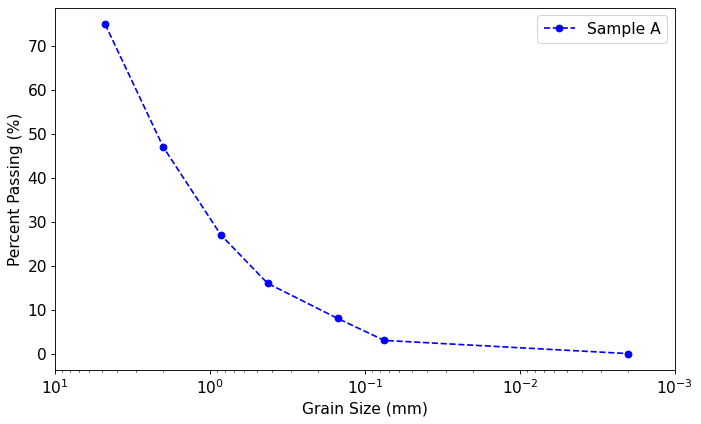

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

sieve = [4, 10, 20, 40, 100, 200, 0]
opening = [4.75, 2.00, 0.850, 0.425, 0.150, 0.075, 0.002]

# Update the percentage finer to plot different GSDs
# (copy this line to create additional samples)
pfiner_A = [75, 47, 27, 16, 8, 3, 0]

figure(figsize=(10, 6), dpi=80)
plt.rcParams.update({'font.size': 14})
# Plot for sample A (copy this line to create additional samples)
plt.semilogx(opening, pfiner_A,linestyle='--', marker='o', color='b', label='Sample A')
plt.xlim(0.001, 10)
plt.gca().invert_xaxis()
plt.xlabel("Grain Size (mm)")
plt.ylabel("Percent Passing (%)")
plt.legend()
plt.show()